In [7]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [8]:
city = "raw_data/city_data.csv"
ride = "raw_data/ride_data.csv"

city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

In [9]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [16]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


## Bubble Plot of Ride Sharing Data

In [10]:
num_ride = pd.DataFrame(ride_df.groupby(['city'])['date'].count())
num_ride = num_ride.reset_index()
num_ride = num_ride.rename(columns={'date':'Total Number of Rides'})
num_ride.head()

,city,Total Number of Rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [11]:
avg_fare = pd.DataFrame(ride_df.groupby(['city'])['fare'].mean())
avg_fare = avg_fare.reset_index()
avg_fare = avg_fare.rename(columns={'fare':'Average Fare'})
avg_fare.head()

,city,Average Fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [12]:
merge_df = pd.merge(city_df,num_ride,how='outer',on='city')
merge_df = pd.merge(merge_df,avg_fare,how='outer',on='city')
urban_df = merge_df.loc[merge_df['type']=='Urban']
suburban_df = merge_df.loc[merge_df['type']=='Suburban']
rural_df = merge_df.loc[merge_df['type']=='Rural']

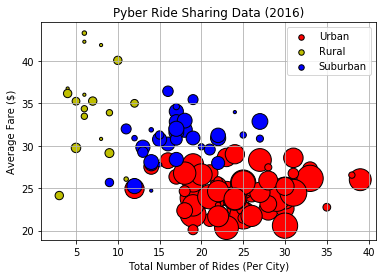

In [15]:
urban = plt.scatter(x=urban_df["Total Number of Rides"], y=urban_df["Average Fare"], s=urban_df['driver_count']*10,c='r',edgecolors='black',label='Urban')
rural = plt.scatter(x=rural_df["Total Number of Rides"], y=rural_df["Average Fare"], s=rural_df['driver_count']*10,c='y',edgecolors='black',label='Rural')
suburban = plt.scatter(x=suburban_df["Total Number of Rides"], y=suburban_df["Average Fare"], s=suburban_df['driver_count']*10,c='b',edgecolors='black',label='Suburban')
plt.legend(handles=[urban,rural,suburban])
leg = plt.legend()
leg.legendHandles[0]._sizes = [30]
leg.legendHandles[1]._sizes = [30]
leg.legendHandles[2]._sizes = [30]
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.show()

## Total Fares by City Type

In [32]:
total_fare = pd.DataFrame(ride_df.groupby(['city'])['fare'].sum())
total_fare = total_fare.reset_index()
ctype = city_df.loc[:,['city','type']]
fare_ctype = pd.merge(total_fare,ctype,how='outer',on='city')
fare_ctype.head()

,city,fare,type
0,Amandaburgh,443.55,Urban
1,Barajasview,557.31,Urban
2,Barronchester,582.76,Suburban
3,Bethanyland,593.21,Suburban
4,Bradshawfurt,400.64,Rural


In [55]:
tot_fare_ctype = fare_ctype.groupby(['type'])['fare'].sum()
tot_fare_ctype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

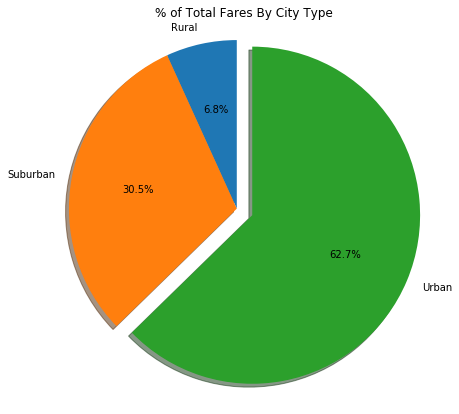

In [57]:
labels1 = [x for x in tot_fare_ctype.index]
sizes1 = [x for x in tot_fare_ctype]
explode1 = (0, 0, 0.1) 

fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('% of Total Fares By City Type')

plt.show()

## Total Rides by City Type

In [54]:
ride_ctype = pd.merge(num_ride,ctype,how='outer',on='city')
ride_ctype.head()

,city,Total Number of Rides,type
0,Amandaburgh,18,Urban
1,Barajasview,22,Urban
2,Barronchester,16,Suburban
3,Bethanyland,18,Suburban
4,Bradshawfurt,10,Rural


In [56]:
tot_ride_ctype = ride_ctype.groupby(['type'])['Total Number of Rides'].sum()
tot_ride_ctype

type
Rural        125
Suburban     625
Urban       1625
Name: Total Number of Rides, dtype: int64

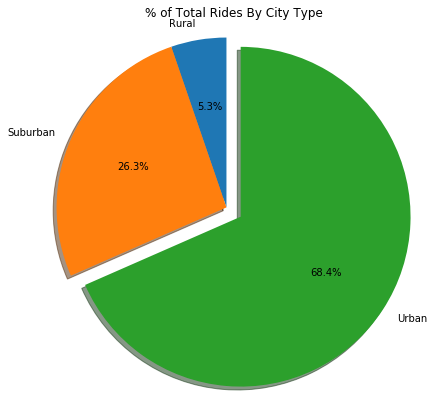

In [62]:
labels2 = [x for x in tot_ride_ctype.index]
sizes2 = [x for x in tot_ride_ctype]
explode2 = (0, 0, 0.1)

fig2, ax2 = plt.subplots(figsize = (7,7))
ax2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('% of Total Rides By City Type')

plt.show()

## Total Drivers by City Type

In [60]:
tot_driver_ctype = city_df.groupby(['type'])['driver_count'].sum()
tot_driver_ctype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

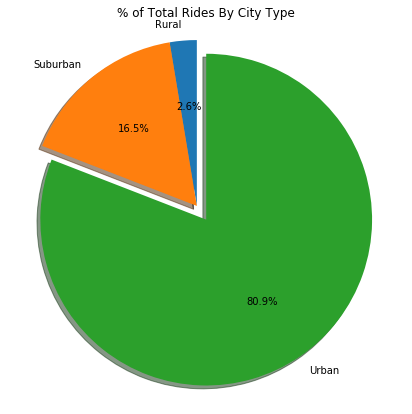

In [61]:
labels3 = [x for x in tot_driver_ctype.index]
sizes3 = [x for x in tot_driver_ctype]
explode3 = (0, 0, 0.1)

fig3, ax3 = plt.subplots(figsize = (7,7))
ax3.pie(sizes3, explode=explode3, labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('% of Total Rides By City Type')

plt.show()